# **Flexão de vigas**
*Professor Rafael Barros*
___

## Tensões de flexão em vigas
De acordo com a teoria clássica de vigas, as tensões normais de flexão em uma seção transversal podem ser determinadas através da equação a a seguir:

$\sigma_x = \frac{N}{A} - \frac{M_z y}{I_z} + \frac{M_y z}{I_y}$ <br>

Onde:<br>
* **N** é a força normal na seção
* **A** é a área da seção
* **$M_z$**, **$M_y$** são os momentos fletores em torno dos eixos z e y, respectivamente
* **$I_z$**, **$I_y$** são os momentos de inércia em torno dos eixos z e y, respectivamente
* **z**, **y** são as coordenadas da superfície da seção transversal

## Exemplo - seção retangular



                    RESISTÊNCIA DOS MATERIAIS
                     Professor Rafael Barros

DISTRIBUIÇÃO DE TENSÕES DE FLEXÃO EM UMA VIGA DE SEÇÃO RETANGULAR
-----------------------------------------------------------------
Momento em torno de z:              Mz        = 11.00 kNm
Momento em torno de y:              My        = 0.00 kNm
Momento fletor resultante:          M         = 11.00 kNm
Ângulo do momento solicitante:      theta     = 0.00 °
Esforço normal:                     N         = -110.00 kN
Momento de inércia em relação a z:  Iz        = 106666.67 cm4
Momento de inércia em relação a y:  Iy        = 26666.67 cm4
Tensão normal máxima:               sigma_max = 0.69 MPa
Tensão normal mínima:               sigma_min = -3.44 MPa
Inclinação da linha neutra:         alpha     = 33.69 °
-----------------------------------------------------------------



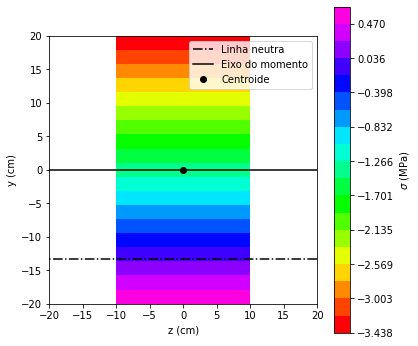

In [10]:
#Funções utilizadas
from FuncoesFlexao import TensFlexRet

#Dados de entrada
b = 40 #cm (largura da base)
h = 80 #cm (altura)
Mz = 11 #kNm (momento em torno de z: +compressão no topo, -compressão na base)
My = 0 #kNm (momento em torno de y: +compressão à direita, -compressão à esquerda)
N = -110 #kN (Esforço normal na seção: +tração, -compressão)

#Cálculos
TensFlexRet(b, h, Mz, My, N)

## Exemplo - seção em I



                    RESISTÊNCIA DOS MATERIAIS
                     Professor Rafael Barros

DISTRIBUIÇÃO DE TENSÕES DE FLEXÃO EM UMA VIGA DE SEÇÃO EM I
-----------------------------------------------------------------
Momebnto em torno de z:             Mz        = 60.00 kNm
Momebnto em torno de y:             My        = 9.90 kNm
Momento fletor resultante:          M         = 60.81 kNm
Ângulo do momento solicitante:      theta     = 9.37 °
Esforço normal:                     N         = -360.00 kN
Momento de inércia em relação a z:  Iz        = 14655.38 cm4
Momento de inércia em relação a y:  Iy        = 2007.59 cm4
Tensão normal máxima:               sigma_max = 74.90 MPa
Tensão normal mínima:               sigma_min = -146.54 MPa
Inclinação da linha neutra:         alpha     = 60.78 °
-----------------------------------------------------------------



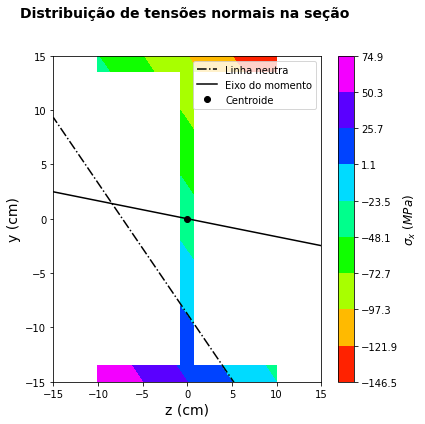

In [7]:
from FuncoesFlexao import TensFlexI

d = 30 #cm
bf = 20 #cm
tw = 1.5
tf = 1.5
#P= 0 #kN
Mz = 60 #kNm (momento em torno de z: +compressão no topo, -compressão na base)
My = 9.9 #kNm (momento em torno de y: +compressão à direita, -compressão à esquerda)
N = -360 #kN

TensFlexI(d, bf, tf, tw, Mz, My, N)

## Exemplo - seção em C



                    RESISTÊNCIA DOS MATERIAIS
                     Professor Rafael Barros

DISTRIBUIÇÃO DE TENSÕES DE FLEXÃO EM UMA VIGA DE SEÇÃO EM C
-----------------------------------------------------------------
Momento em torno de z:             Mz        = 184.62 kNm
Momento em torno de y:             My        = 443.08 kNm
Momento fletor resultante:          M         = 480.00 kNm
Ângulo do momento solicitante:      theta     = 67.38 °
Esforço normal:                     N         = 0.00 kN
Momento de inércia em relação a z:  Iz        = 36682.67 cm4
Momento de inércia em relação a y:  Iy        = 5760.14 cm4
Tensão normal máxima:               sigma_max = 541.94 MPa
Tensão normal mínima:               sigma_min = -1197.79 MPa
Inclinação da linha neutra:         alpha     = 86.26 °
-----------------------------------------------------------------



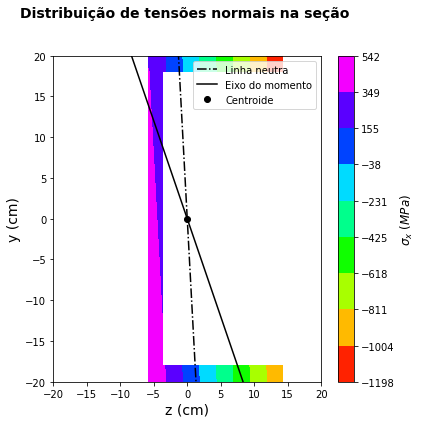

In [5]:
from FuncoesFlexao import TensFlexC

d = 40  #Altura total, em cm
bf = 20 #Largura da mesa, em cm
tw = 2  #Espessura da alma, em cm
tf = 2  #Espessura da mesa, em cm
Mz = 184.615 #kNm (momento em torno de z: +compressão no topo, -compressão na base)
My = 443.077 #kNm (momento em torno de y: +compressão à direita, -compressão à esquerda)
N = 0 #kN

TensFlexC(d, bf, tw, tf, Mz, My, N)